### Data fields
Most of the fields are self-explanatory. The following are descriptions for those that aren't.

- Id - an Id that represents a (Store, Date) duple within the test set

- Store - a unique Id for each store

- Sales - the turnover for any given day (this is what you are predicting)

- Customers - the number of customers on a given day

- Open - an indicator for whether the store was open: 0 = closed, 1 = open

- StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

- SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

- StoreType - differentiates between 4 different store models: a, b, c, d

- Assortment - describes an assortment level: a = basic, b = extra, c = extended

- CompetitionDistance - distance in meters to the nearest competitor store

- CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

- Promo - indicates whether a store is running a promo on that day

- Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

- Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

- PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. 
"Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings

warnings.filterwarnings('ignore')

In [23]:
store_df = pd.read_csv('../../dataset/RossmannStoreSalesData/store.csv')
train_df = pd.read_csv('../../dataset/RossmannStoreSalesData/train.csv')
test_df = pd.read_csv('../../dataset/RossmannStoreSalesData/test.csv')

store_df.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [12]:
print('count null store dataset\n', store_df.isna().sum())
store_df.describe()

count null store dataset
 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.000000     0.000000         1.000000      2009.000000  
25%                 2006.000000     0.000000        13.000000      2011.000000  
50%                 2010.000000     1.000000        22.000000      2012.000000  
75%                 2013.000000     1.000000        37.000000      2013.000000  
max                 2015.000000     1.000000        50.000000      2015.000000

In [13]:
print('count null train dataset\n', train_df.isna().sum())
train_df.describe()

count null train dataset
 Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  
count  1.017209e+06   1.017209e+06  
mean   3.815145e-01   1.786467e-01  
std    4.857586e-01   3.830564e-01  
min    0.000000e+00   0.000000e+00  
25%    0.000000e+00   0.000000e+00  
50%    0.000000e+00   0.000000e+00  
75%    1.000000e+00   0.000000e+00  
max    1.000000e+00   1.000000e+00

In [25]:
# merge both store_df and train_df into one dataset on ID 'store'
sales_df = store_df.merge(train_df, on=['Store'], how='inner')
print('the shape of sales_df:',sales_df.shape)
sales_df.head()

the shape of sales_df: (1017209, 18)


Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      1         c          a               1270.0                        9.0   
2      1         c          a               1270.0                        9.0   
3      1         c          a               1270.0                        9.0   
4      1         c          a               1270.0                        9.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2008.0       0              NaN              NaN   
2                    2008.0       0              NaN              NaN   
3                    2008.0       0              NaN              NaN   
4                    2008.0       0              NaN              NaN   

  PromoInterval  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0           NaN          5  2015-07-31   5263        555     1      1   
1           NaN          4  2015-07-30   5020        546     1      1   
2           NaN          3  2015-07-29   4782        523     1      1   
3           NaN          2  2015-07-28   5011        560     1      1   
4           NaN          1  2015-07-27   6102        612     1      1   

  StateHoliday  SchoolHoliday  
0            0              1  
1            0              1  
2            0              1  
3            0              1  
4            0              1

In [20]:
# checking the no. of NaN values
print(sales_df.isna().sum())

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64


In [26]:
# drop the columns of Promo2SinceWeek because of having too many missing value
sales_df = sales_df.drop(columns=['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'])

# columns of CompetitionDistance would be substituted by the 'mode' of column
sales_df.CompetitionDistance.fillna(sales_df.CompetitionDistance.mode()[0], inplace=True)
sales_df.CompetitionOpenSinceMonth.fillna(sales_df.CompetitionOpenSinceMonth.mode()[0], inplace=True)
sales_df.CompetitionOpenSinceYear.fillna(sales_df.CompetitionOpenSinceYear.mode()[0], inplace=True)
sales_df.CompetitionOpenSinceMonth = sales_df.CompetitionOpenSinceMonth.astype(int)
sales_df.CompetitionOpenSinceYear = sales_df.CompetitionOpenSinceYear.astype(int)

sales_df.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                          9   
1      1         c          a               1270.0                          9   
2      1         c          a               1270.0                          9   
3      1         c          a               1270.0                          9   
4      1         c          a               1270.0                          9   

   CompetitionOpenSinceYear  Promo2  DayOfWeek        Date  Sales  Customers  \
0                      2008       0          5  2015-07-31   5263        555   
1                      2008       0          4  2015-07-30   5020        546   
2                      2008       0          3  2015-07-29   4782        523   
3                      2008       0          2  2015-07-28   5011        560   
4                      2008       0          1  2015-07-27   6102        612   

   Open  Promo StateHoliday  SchoolHoliday  
0     1      1            0              1  
1     1      1            0              1  
2     1      1            0              1  
3     1      1            0              1  
4     1      1            0              1

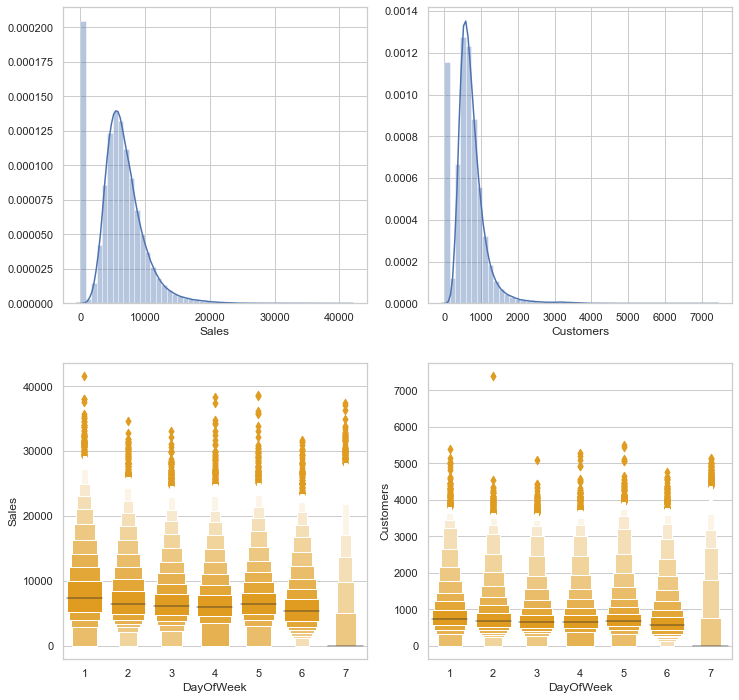

In [49]:
# find the range of sales
fig = plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
sns.set(style='whitegrid')
sns.distplot(sales_df['Sales'])

# find the range of customer
plt.subplot(2, 2, 2)
sns.set(style='whitegrid')
sns.distplot(sales_df['Customers'])

# find the releationship of dayofweek
plt.subplot(2, 2, 3)
sns.set(style='whitegrid')
sns.boxenplot(data=sales_df, scale='linear', x='DayOfWeek', y='Sales', color='orange')

plt.subplot(2, 2, 4)
sns.set(style='whitegrid')
sns.boxenplot(data=sales_df, scale='linear', x='DayOfWeek', y='Customers', color='orange')

In [68]:
"""
obviously, the data contains many outliers from the boxenplot, maybe it was from a festival or a promo, but i will cap off for the model.  
sales at 2000, customers at 3000
"""

sales_df['Sales'] = sales_df['Sales'].apply(lambda x: 2000 if x > 2000 else x)
sales_df['Customers'] = sales_df['Customers'].apply(lambda y :3000 if y > 3000 else y)
# print(max(sales_df['Sales']))
# print(max(sales_df['Customers']))

# deal date
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df['Year'] = sales_df['Date'].dt.year
sales_df['Month'] = sales_df['Date'].dt.month
sales_df['Day'] = sales_df['Date'].dt.day
sales_df['Week'] = sales_df['Date'].dt.week%4
sales_df['Season'] = np.where(sales_df['Month'].isin([3, 4]), 'Spring', 
                              np.where(sales_df['Month'].isin([5, 6, 7, 8]), 'Summer', 
                                       np.where(sales_df['Month'].isin([9, 10, 11]), 'Autumn', 
                                               np.where(sales_df['Month'].isin([12, 1, 2]), 'Winter', 'None'))))

In [69]:
sales_df

Store StoreType Assortment  CompetitionDistance  \
0            1         c          a               1270.0   
1            1         c          a               1270.0   
2            1         c          a               1270.0   
3            1         c          a               1270.0   
4            1         c          a               1270.0   
...        ...       ...        ...                  ...   
1017204   1115         d          c               5350.0   
1017205   1115         d          c               5350.0   
1017206   1115         d          c               5350.0   
1017207   1115         d          c               5350.0   
1017208   1115         d          c               5350.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                                9                      2008       0   
1                                9                      2008       0   
2                                9                      2008       0   
3                                9                      2008       0   
4                                9                      2008       0   
...                            ...                       ...     ...   
1017204                          9                      2013       1   
1017205                          9                      2013       1   
1017206                          9                      2013       1   
1017207                          9                      2013       1   
1017208                          9                      2013       1   

         DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0                5 2015-07-31   2000        555     1      1            0   
1                4 2015-07-30   2000        546     1      1            0   
2                3 2015-07-29   2000        523     1      1            0   
3                2 2015-07-28   2000        560     1      1            0   
4                1 2015-07-27   2000        612     1      1            0   
...            ...        ...    ...        ...   ...    ...          ...   
1017204          6 2013-01-05   2000        339     1      0            0   
1017205          5 2013-01-04   2000        326     1      0            0   
1017206          4 2013-01-03   2000        300     1      0            0   
1017207          3 2013-01-02   2000        305     1      0            0   
1017208          2 2013-01-01      0          0     0      0            a   

         SchoolHoliday  Year  Month  Day  Week  Season  
0                    1  2015      7   31     3  Summer  
1                    1  2015      7   30     3  Summer  
2                    1  2015      7   29     3  Summer  
3                    1  2015      7   28     3  Summer  
4                    1  2015      7   27     3  Summer  
...                ...   ...    ...  ...   ...     ...  
1017204              1  2013      1    5     1  Winter  
1017205              1  2013      1    4     1  Winter  
1017206              1  2013      1    3     1  Winter  
1017207              1  2013      1    2     1  Winter  
1017208              1  2013      1    1     1  Winter  

[1017209 rows x 20 columns]

In [79]:
# adding an additional feature, that records the no. of Holidays per week
Holidays_df = pd.DataFrame({'Holiday per week': sales_df['SchoolHoliday'], 'Week': sales_df['Week'], 'Month': sales_df['Month'], 
                            'Year': sales_df['Year'], 'Date': sales_df['Date']})
Holidays_df = Holidays_df.drop_duplicates(subset=['Date'])
Holidays_df = Holidays_df.groupby(['Year', 'Month', 'Week']).sum()
# Holidays_df

# adding additional features, that records the avg. no. of Customers per month and avg. no. of Customers per week
customer_time_df = pd.DataFrame({'AvgCustPerMonth': sales_df['Customers'], 'Month': sales_df['Month']})
AvgCustomersPerMonth = customer_time_df.groupby(['Month']).mean()
# AvgCustomersPerMonth

customer_time_df1 = pd.DataFrame({'AvgCustPerWeek': sales_df['Customers'], 'Week': sales_df['Week'],  'Year': sales_df['Year'], 
                                  'Month': sales_df['Month']})
AvgCustomersPerWeek = customer_time_df1.groupby(['Year', 'Month', 'Week']).mean()
# AvgCustomersPerWeek

# adding an additional feature that records the no. of promo per week
Promo_df = pd.DataFrame({'Promo per week': sales_df['Promo'], 'Week': sales_df['Week'], 'Month': sales_df['Month'], 
                            'Year': sales_df['Year'], 'Date': sales_df['Date']})
Promo_df = Promo_df.drop_duplicates(subset=['Date'])
Promo_df = Promo_df.groupby(['Year', 'Month', 'Week']).sum()
# Promo_df

In [82]:
sales_df = sales_df.merge(Holidays_df, on=['Year', 'Month', 'Week'], how='inner')
sales_df = sales_df.merge(AvgCustomersPerMonth, on=['Month'], how='inner')
sales_df = sales_df.merge(AvgCustomersPerWeek, on=['Year', 'Month', 'Week'], how='inner')
sales_df = sales_df.merge(Promo_df, on=['Year', 'Month', 'Week'], how='inner')

sales_df = sales_df.rename(columns={'CompetitionOpenSinceYear': 'year', 'CompetitionOpenSinceMonth': 'month'})
sales_df['CompetitionDistance'] = pd.to_datetime(sales_df[['year', 'month']].assign(DAY=1))
sales_df=sales_df.rename(columns={ 'year':'CompetitionOpenSinceYear','month':'CompetitionOpenSinceMonth'})